In [1]:
#Since our inputs are images, it makes sense to use convolutional neural networks (convnets) 
#as encoders and decoders. In practical settings, autoencoders applied to images 
#are always convolutional autoencoders --they simply perform much better.
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [2]:
#To train it, we will use the original MNIST digits with shape (samples, 3, 28, 28), 
#we will just normalize pixel values between 0 and 1.
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 17s 14ms/step - loss: 0.2150 - val_loss: 0.1482
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1390 - val_loss: 0.1292
Epoch 3/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1255 - val_loss: 0.1200
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1187 - val_loss: 0.1154
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1145 - val_loss: 0.1118
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1115 - val_loss: 0.1091
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1093 - val_loss: 0.1072
Epoch 8/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1076 - val_loss: 0.1054
Epoch 9/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1062 - val_loss: 0.1044
Epoch 10/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1051 - val_l

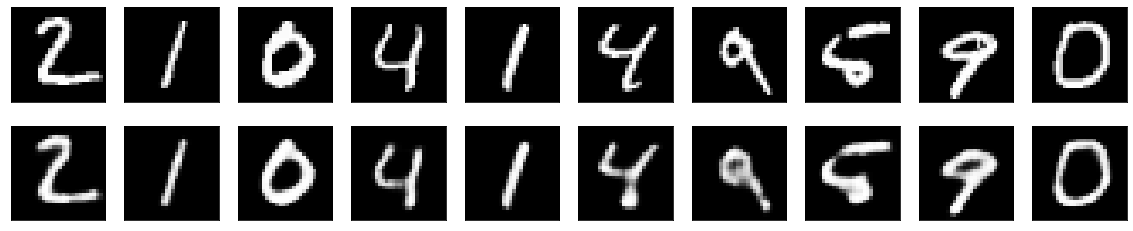

In [5]:
#The model converges to a loss of 0.094, significantly better than our previous models 
#(this is in large part due to the higher entropic capacity of the encoded representation,
#128 dimensions vs. 32 previously). Let's take a look at the reconstructed digits:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
#Let's put our convolutional autoencoder to work on an image denoising problem.
# It's simple: we will train the autoencoder to map noisy digits images to clean digits images.
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

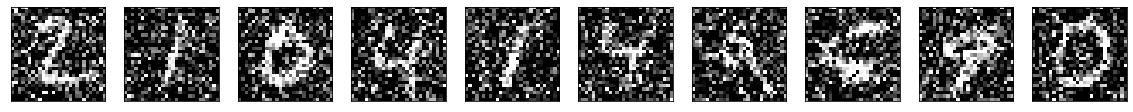

In [8]:
# Here is what the noisy mages look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 8s 15ms/step - loss: 0.1662 - val_loss: 0.1162
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1131 - val_loss: 0.1087
Epoch 3/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1080 - val_loss: 0.1051
Epoch 4/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1052 - val_loss: 0.1040
Epoch 5/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1033 - val_loss: 0.1018
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1021 - val_loss: 0.1006
Epoch 7/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1009 - val_loss: 0.0995
Epoch 8/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1000 - val_loss: 0.0988
Epoch 9/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0994 - val_loss: 0.0986
Epoch 10/100
469/469 [==============================] - 7s 14ms/step - loss: 0.098

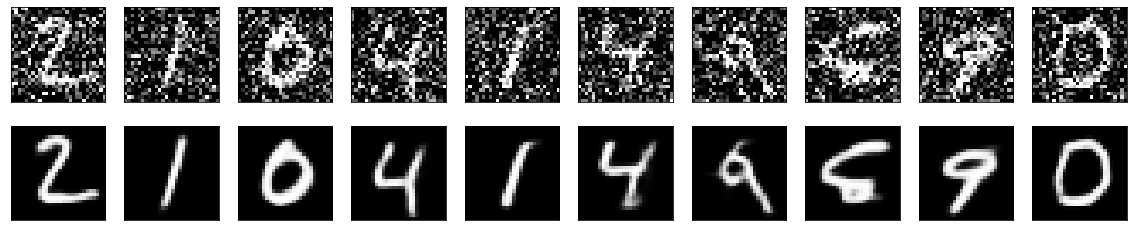

In [11]:
#Now let's take a look at the results. 
#Top, the noisy digits fed to the network, and bottom, the digits are reconstructed by the network.
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
